# Fishing with A2C

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import gym
import gym_fishing

from stable_baselines3 import A2C

In [2]:
env = gym.make('fishing-v0')
env.n_actions = 100
model = A2C('MlpPolicy', env, verbose=1)

Using cpu device
Wrapping the env in a DummyVecEnv.


In [3]:
model.learn(total_timesteps=200000)

imesteps    | 181500    |
| train/                |           |
|    entropy_loss       | -4.05e-05 |
|    explained_variance | -0.0378   |
|    learning_rate      | 0.0007    |
|    n_updates          | 36299     |
|    policy_loss        | -1.41e-09 |
|    value_loss         | 6.25e-07  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 975       |
|    iterations         | 36400     |
|    time_elapsed       | 186       |
|    total timesteps    | 182000    |
| train/                |           |
|    entropy_loss       | -4.56e-05 |
|    explained_variance | 0.0109    |
|    learning_rate      | 0.0007    |
|    n_updates          | 36399     |
|    policy_loss        | 5.06e-09  |
|    value_loss         | 4.55e-06  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 975       |
|    iterations         

In [4]:
def simulate(environment, model):
  obs = env.reset()
  episode_return = 0.0
  output = np.zeros(shape = (1000, 4))

  for it in range(1000):
    action, _states = model.predict(obs)
    obs, reward, dones, info = env.step(action)  
    episode_return += reward
    output[it] = (it, obs, action, episode_return)
  return output

In [6]:
out = simulate(env, model)
np.savetxt("a2c.csv", out, delimiter=",")

### Vizualisation

In [8]:
datapath = '/Users/kevinab/Desktop/PRe/conservation-agents/a2c.csv'
results = pd.read_csv(datapath, names=['time','state','harvest','action'])

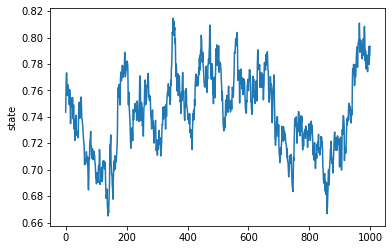

In [9]:
plt.plot(results.iloc[:,1])
plt.ylabel('state')
plt.show()

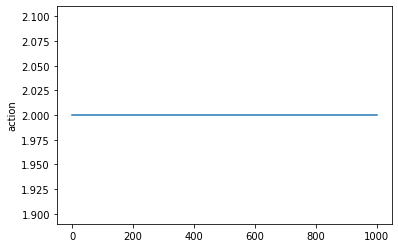

In [10]:
plt.plot(results.iloc[:,2])
plt.ylabel('action')
plt.show()

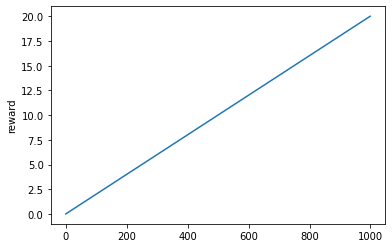

In [11]:
plt.plot(results.iloc[:,3])
plt.ylabel('reward')
plt.show()